In [4]:
import pandas as pd
import requests
from requests.auth import HTTPBasicAuth 
from PIL import Image
import shutil
import os
import pathlib
import json

In [30]:
df =pd.read_csv('../../../Downloads/observations(1).csv')

In [31]:
pd.options.display.max_columns = 200

In [32]:
df.head()

,observation_id,deployment_id,file_name,file_mimetype,file_location,date_recorded,is_empty,sequence_based,sequence_id,observation_type,species_latin,species_common,uncertainty,count,count_new,age,sex,behaviour,individual_id,comments,bboxes,_id
0,1,S1-A-001-712,IMAG0010,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-07 02:50:38+00:00,False,True,NaN,Animal,Sus scrofa,Wild Boar,NaN,1.0,1.0,Undefined,Undefined,Undefined,NaN,NaN,"[[0.002325581395348837, 0.586046511627907, 0.0...",402157
1,2,S1-A-001-712,IMAG0012,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-10 17:20:30+00:00,False,True,NaN,Animal,Sus scrofa,Wild Boar,NaN,1.0,1.0,Adult,Undefined,Walking,NaN,NaN,[],402159
2,3,S1-A-002-783,IMAG0015,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-08 05:38:02+00:00,False,True,NaN,Animal,Cervus elaphus,Red Deer,NaN,1.0,1.0,Adult,Female,Walking,NaN,NaN,[],402164
3,4,S1-A-003-786,IMAG0007,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-06 18:12:00+00:00,False,True,NaN,Animal,Cervus elaphus,Red Deer,NaN,1.0,1.0,Undefined,Male,Undefined,NaN,NaN,[],402166
4,5,S1-A-003-786,IMAG0011,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-06 19:25:44+00:00,False,True,NaN,Animal,Cervus elaphus,Red Deer,NaN,1.0,1.0,Undefined,Undefined,Undefined,NaN,NaN,[],402168


In [33]:
df_images=df[df.file_mimetype=='image/jpeg']

In [34]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19920 entries, 0 to 33622
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_id    19920 non-null  int64  
 1   deployment_id     19908 non-null  object 
 2   file_name         19920 non-null  object 
 3   file_mimetype     19920 non-null  object 
 4   file_location     19920 non-null  object 
 5   date_recorded     19920 non-null  object 
 6   is_empty          19920 non-null  bool   
 7   sequence_based    19920 non-null  bool   
 8   sequence_id       7411 non-null   float64
 9   observation_type  13135 non-null  object 
 10  species_latin     13135 non-null  object 
 11  species_common    13135 non-null  object 
 12  uncertainty       0 non-null      float64
 13  count             13135 non-null  float64
 14  count_new         9123 non-null   float64
 15  age               13135 non-null  object 
 16  sex               13135 non-null  object

In [35]:
df_images.file_name.nunique()

5471

In [36]:
df_images.file_location.nunique()

19339

In [37]:
df_images._id.nunique()

19341

### EDA

In [38]:
df_images.head()

,observation_id,deployment_id,file_name,file_mimetype,file_location,date_recorded,is_empty,sequence_based,sequence_id,observation_type,species_latin,species_common,uncertainty,count,count_new,age,sex,behaviour,individual_id,comments,bboxes,_id
0,1,S1-A-001-712,IMAG0010,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-07 02:50:38+00:00,False,True,NaN,Animal,Sus scrofa,Wild Boar,NaN,1.0,1.0,Undefined,Undefined,Undefined,NaN,NaN,"[[0.002325581395348837, 0.586046511627907, 0.0...",402157
1,2,S1-A-001-712,IMAG0012,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-10 17:20:30+00:00,False,True,NaN,Animal,Sus scrofa,Wild Boar,NaN,1.0,1.0,Adult,Undefined,Walking,NaN,NaN,[],402159
2,3,S1-A-002-783,IMAG0015,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-08 05:38:02+00:00,False,True,NaN,Animal,Cervus elaphus,Red Deer,NaN,1.0,1.0,Adult,Female,Walking,NaN,NaN,[],402164
3,4,S1-A-003-786,IMAG0007,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-06 18:12:00+00:00,False,True,NaN,Animal,Cervus elaphus,Red Deer,NaN,1.0,1.0,Undefined,Male,Undefined,NaN,NaN,[],402166
4,5,S1-A-003-786,IMAG0011,image/jpeg,https://data.trapper-project.org/storage/resou...,2012-08-06 19:25:44+00:00,False,True,NaN,Animal,Cervus elaphus,Red Deer,NaN,1.0,1.0,Undefined,Undefined,Undefined,NaN,NaN,[],402168


In [39]:
print('Liczba kategorii: ', df_images.species_common.nunique())
df_images.species_common.value_counts()

Liczba kategorii:  23


Wild Boar                3609
Red Deer                 2763
Other                    1355
Red Fox                  1273
Raccoon Dog               821
European Bison            554
Humans - Cars             553
Roe Deer                  331
Eurasian Elk              320
Eurasian Red Squirrel     311
European Pine Marten      265
Wolf                      261
European Badger           229
Undefined                 220
Domestic Cat              137
Domestic Dog               47
European Hare              36
Birds                      33
Eurasian Lynx              10
Human                       3
Humans - Bikes              2
Rodent                      1
Least Weasel                1
Name: species_common, dtype: int64

Kategorie z tłumaczeniami:
Wild Boar	--> 	Dzik
Red Deer	--> 	Czerwony jeleń
Other	--> 	Inny
nan	--> 	nan
Eurasian Elk	--> 	Eurasian Elk
Eurasian Red Squirrel	--> 	Eurasian Red Squirrel
Red Fox	--> 	Czerwony lis
Roe Deer	--> 	Sarna
European Pine Marten	--> 	Kuna zwyczajna
Raccoon Dog	--> 	Szop
European Bison	--> 	Żubr
Undefined	--> 	Nieokreślony
Domestic Cat	--> 	Kot domowy
Wolf	--> 	Wilk
Domestic Dog	--> 	Pies domowy
European Badger	--> 	Borsuk europejski
Humans - Cars	--> 	Ludzie - samochody
Eurasian Lynx	--> 	Ryś euroazjatycki
European Hare	--> 	Zając Europejski
Human	--> 	Człowiek
Humans - Bikes	--> 	„Ludzie - rowery”
Least Weasel	--> 	Least Weasel
Birds	--> 	Ptaki
Rodent	--> 	Gryzoń

In [40]:
df_images.is_empty.value_counts()

False    13601
True      6319
Name: is_empty, dtype: int64

Zostaną odfiltrowane tylko te zdjęcia które nie są puste. 

Zostają wykluczone klasy:
* Other
* nan
* Undefined
* Humans - Cars - wymieszane obiekty

Oraz klasy z zbyt małą liczbą obserwacji(<80):
* European Hare 
* Humans - Bikes
* Least Weasel
* Rodent
* Eurasian Lynx
* Human
* Birds
* Domestic Dog

Oraz zostają odfiltrowane tylko zdjęcia.

Zostaną również odrzucone zdjęcia bez przypisanej klasy.

Zostają również wykluczone uszkodzone zdjęcia:
* https://data.trapper-project.org/storage/resource/media/13976/file/

* https://data.trapper-project.org/storage/resource/media/5792/file/
* https://data.trapper-project.org/storage/resource/media/13978/file/

In [41]:
from copy import deepcopy

In [42]:
dataDirectory = pathlib.Path('../data')

In [43]:
train_path = dataDirectory /'train'
test_path  = dataDirectory / 'test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['Wolf', 'Wild Boar', 'Eurasian Red Squirrel', 'European Badger', 'European Bison', 'Raccoon Dog', 'Red Deer', 'Red Fox', 'Domestic Cat', 'Eurasian Elk', 'Roe Deer', 'European Pine Marten']
['Wolf', 'Wild Boar', 'Eurasian Red Squirrel', 'European Badger', 'European Bison', 'Raccoon Dog', 'Red Deer', 'Red Fox', 'Domestic Cat', 'Eurasian Elk', 'Roe Deer', 'European Pine Marten']


In [44]:
unwanted_classes=['Other', 'nan', 'Undefined', 'Humans - Cars', 'European Hare', 'Humans - Bikes', 
                  'Least Weasel', 'Rodent', 'Eurasian Lynx', 'Human', 'Birds', 'Domestic Dog', 'Domestic Cat']
filtered_df = df_images[~df_images.species_common.isin(unwanted_classes)&(df_images.is_empty == False)&
                 (df_images.file_mimetype=='image/jpeg')&
                (~df_images.file_location.isin(['https://data.trapper-project.org/storage/resource/media/5792/file/',
                                        'https://data.trapper-project.org/storage/resource/media/13976/file/',
                                        'https://data.trapper-project.org/storage/resource/media/13978/file/']))]
filtered_df2 = deepcopy(filtered_df)
filtered_df2.dropna(inplace=True, subset=['species_common'])

In [45]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10736 entries, 0 to 33610
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_id    10736 non-null  int64  
 1   deployment_id     10736 non-null  object 
 2   file_name         10736 non-null  object 
 3   file_mimetype     10736 non-null  object 
 4   file_location     10736 non-null  object 
 5   date_recorded     10736 non-null  object 
 6   is_empty          10736 non-null  bool   
 7   sequence_based    10736 non-null  bool   
 8   sequence_id       4408 non-null   float64
 9   observation_type  10736 non-null  object 
 10  species_latin     10736 non-null  object 
 11  species_common    10736 non-null  object 
 12  uncertainty       0 non-null      float64
 13  count             10736 non-null  float64
 14  count_new         7396 non-null   float64
 15  age               10736 non-null  object 
 16  sex               10736 non-null  object

In [46]:
# tyle mam końcowo danych do modelowania
len(filtered_df2._id.drop_duplicates())

10165

### Podział danych na poszczególne katalogi

In [47]:
labels=list(filtered_df2.species_common.unique())

Końcowo mamy 11 klas.

In [44]:
filtered_df2.species_common.value_counts()

Wild Boar                3609
Red Deer                 2763
Red Fox                  1272
Raccoon Dog               821
European Bison            554
Roe Deer                  331
Eurasian Elk              320
Eurasian Red Squirrel     311
European Pine Marten      265
Wolf                      261
European Badger           229
Name: species_common, dtype: int64

In [45]:
len(os.listdir(data_dir))

19354

In [46]:
import matplotlib.pyplot as plt

In [47]:
def draw_category_images(df, var,cols=3):
    categories = (df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(3*cols,3*len(categories)))
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=str(data_dir) +'/' +str(sample.iloc[j]['_id'])+'.jpg'
            im = Image.open(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.tight_layout()
    plt.show()

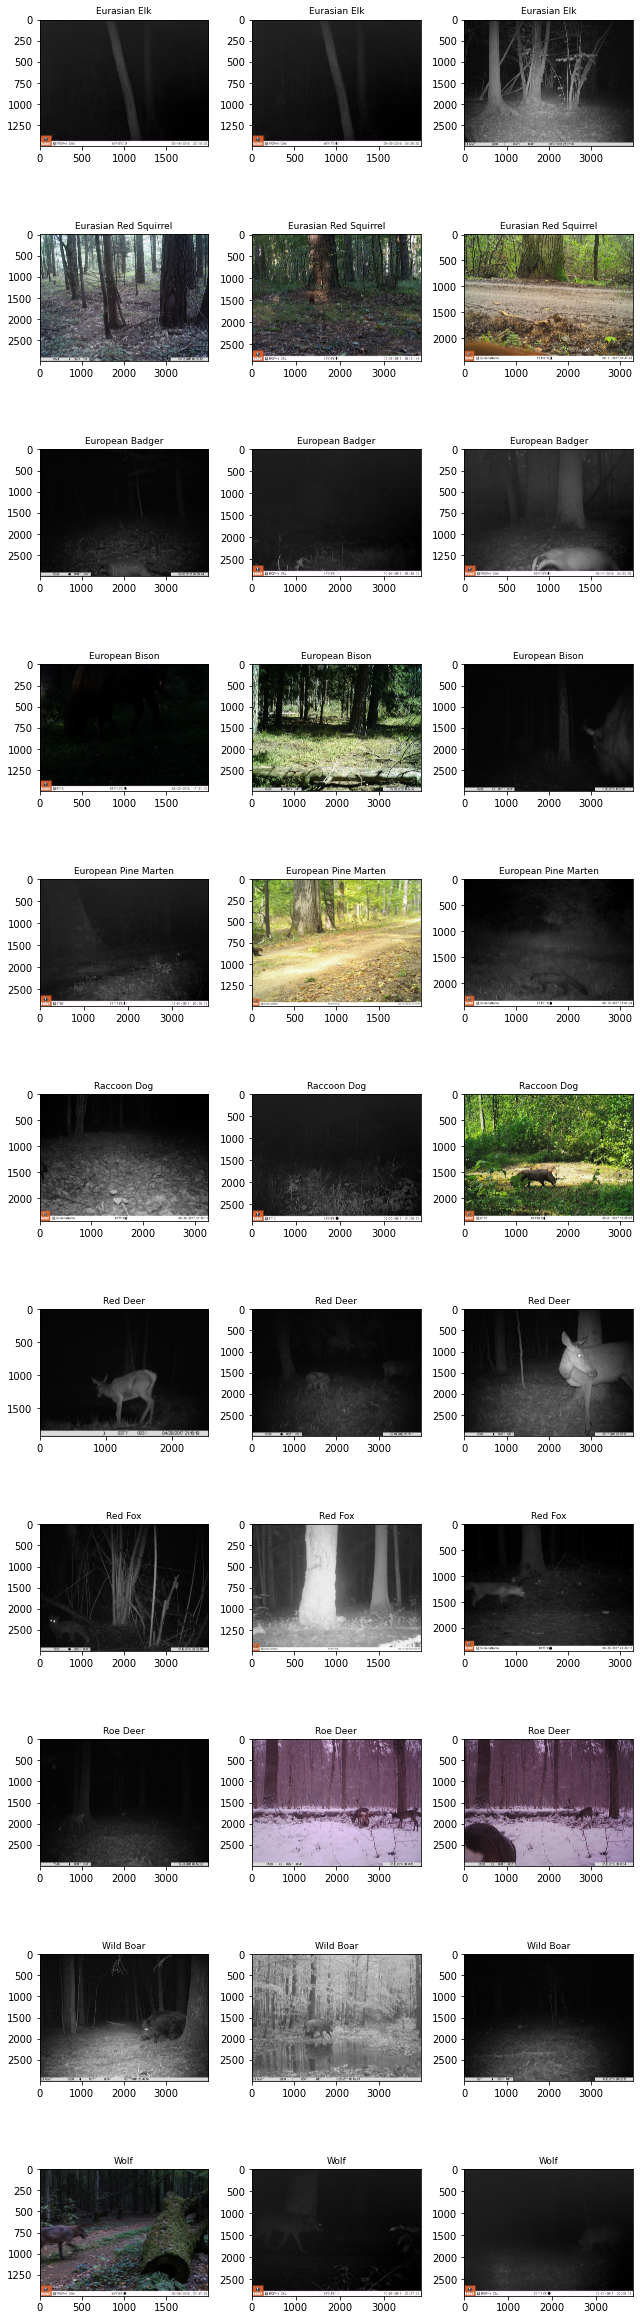

In [48]:
# Przedstawienie losowych zdjęć z zbioru danych 
draw_category_images(filtered_df2, 'species_common')

## data augmentation - in trapper analytics

## keras preprocessing 

Do przekazania danych do modelu zostanie wykorzystany moduł image_dataset_from_directory z pakietu kerasowego. 
Ta metoda wymaga aby każda klasa znajdowała się w osobnym katalogu.

In [51]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [52]:
img_height = 224
img_width = 224
BATCH_SIZE = 128

In [53]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        featurewise_std_normalization=True, # data normalization
        validation_split=0.2) # set validation split

/home/greg/anaconda3/envs/trapper-analytics/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [54]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    classes=labels,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    classes=labels,
    subset='validation') # set as validation data

test_generator = ImageDataGenerator(featurewise_std_normalization=True).flow_from_directory(
    test_path, 
    target_size=(img_height, img_width), 
    classes=labels,
    shuffle= False,
    batch_size = BATCH_SIZE)# set as test data

Found 7656 images belonging to 11 classes.
Found 1909 images belonging to 11 classes.
Found 330 images belonging to 11 classes.


### Modelowanie

In [14]:
from keras.models import load_model
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.applications import DenseNet121
import json
import matplotlib.pyplot as plt

In [19]:
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=19
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" — val_precision: {_val_precision:.4f}"
               f" — val_recall: {_val_recall:.4f}"))

        return

f1_metrics = Metrics()

In [64]:
#zrobimy test jak się zachowa sam DenseNet121 bez danych lila
model_densenet = DenseNet121(
    weights='../../lila/input/densenet-keras/DenseNet-BC-121-32-no-top.h5',
    include_top=False,
    input_shape=(img_height,img_width,3)
)

In [65]:
cnt_classes_images = filtered_df2.species_common.nunique()

In [66]:
# definicja architektury sieci neuronowej
# blokada wag na pierwszej warstwie TL
model_densenet.trainable = False

model = Sequential()
model.add(model_densenet)
model.add(Dropout(0.2))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(cnt_classes_images, activation='softmax'))

In [67]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [68]:
checkpoint = ModelCheckpoint(
    '../models/model(densenet121)_20210531.h5', 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 3, 3, 1024)        7037504   
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 1024)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 11)                11275     
Total params: 7,048,779
Trainable params: 11,275
Non-trainable params: 7,037,504
_________________________________________________________________


In [71]:
%time
earlystop = EarlyStopping(monitor='val_loss', patience=5) #patience - ile epochow minie bez poprawy zanim stop

EPOCHS = 40
history = model.fit(
    x = train_generator,
    validation_data=validation_generator,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[earlystop, checkpoint]
)



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
Epoch 1/40
60/60 [==============================] - 1043s 17s/step - loss: 4.3412 - accuracy: 0.2833 - val_loss: 3.2146 - val_accuracy: 0.3174

Epoch 00001: val_accuracy improved from -inf to 0.31744, saving model to ../models/model(densenet121)_20210531.h5
Epoch 2/40
60/60 [==============================] - 1022s 17s/step - loss: 2.9603 - accuracy: 0.3393 - val_loss: 2.8560 - val_accuracy: 0.3180

Epoch 00002: val_accuracy improved from 0.31744 to 0.31797, saving model to ../models/model(densenet121)_20210531.h5
Epoch 3/40
60/60 [==============================] - 1133s 19s/step - loss: 2.5857 - accuracy: 0.3651 - val_loss: 2.5414 - val_accuracy: 0.3195

Epoch 00003: val_accuracy improved from 0.31797 to 0.31954, saving model to ../models/model(densenet121)_20210531.h5
Epoch 4/40
60/60 [==============================] - 1189s 20s/step - loss: 2.3094 - accuracy: 0.3922 - val_loss: 2.3631 - val_accuracy: 0.3274

Epoch 00004:

In [72]:
with open('../models/model(densenet121)_20210531_history.json', 'w') as f:
    json.dump(history.history, f)

In [7]:
with open('../models/model(densenet121)_20210531_history.json') as f:
    history = json.load(f)

In [9]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [10]:
#h_df = pd.DataFrame(history.history)
h_df = pd.DataFrame(history)

<Figure size 432x288 with 0 Axes>

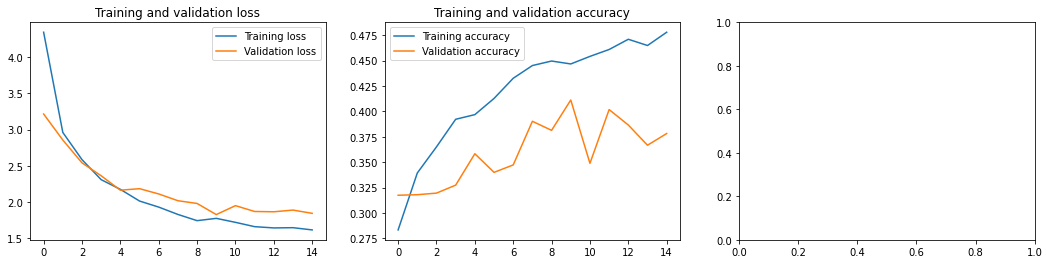

In [21]:
#h_df['val_f1'] = f1_metrics.val_f1s
# h_df['val_precision'] = f1_metrics.val_precisions
# h_df['val_recall'] = f1_metrics.val_recalls
epochs = range(len(h_df['loss']))
plt.figure()
fig, ax = plt.subplots(1,3,figsize=(18,4))
ax[0].plot(epochs,h_df['loss'], label='Training loss')
ax[0].plot(epochs,h_df['val_loss'], label='Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].legend()
ax[1].plot(epochs,h_df['accuracy'],label='Training accuracy')
ax[1].plot(epochs,h_df['val_accuracy'], label='Validation accuracy')
ax[1].set_title('Training and validation accuracy')
ax[1].legend()
#ax[2].plot(epochs,h_df['val_f1'],label='Validation f1-score')
# ax[2].plot(epochs,h_df['val_precision'],label='Validation precision')
# ax[2].plot(epochs,h_df['val_recall'],label='Validation recall')
# ax[2].set_title('Validation f1-score, precision & recall')
# ax[2].legend()
plt.show()

In [22]:
h_df.val_accuracy.max()

0.4112100601196289

## evaluation

In [23]:
from tensorflow import keras

In [24]:
import numpy

In [25]:
import sklearn.metrics as metrics

In [26]:
import seaborn as sns

In [27]:
model = keras.models.load_model('../models/model(densenet121)_20210531.h5')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 3, 3, 1024)        7037504   
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 1024)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 11)                11275     
Total params: 7,048,779
Trainable params: 11,275
Non-trainable params: 7,037,504
_________________________________________________________________


In [66]:
predictions = model.predict_generator(test_generator, steps=10)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

In [60]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

In [67]:
predictions.shape

(330, 11)

In [68]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

                       precision    recall  f1-score   support

            Wild Boar       0.19      0.43      0.26        30
             Red Deer       0.08      0.20      0.12        30
         Eurasian Elk       0.00      0.00      0.00        30
Eurasian Red Squirrel       0.22      0.70      0.33        30
              Red Fox       0.00      0.00      0.00        30
             Roe Deer       0.02      0.03      0.02        30
 European Pine Marten       0.00      0.00      0.00        30
          Raccoon Dog       0.00      0.00      0.00        30
       European Bison       0.00      0.00      0.00        30
                 Wolf       0.60      0.10      0.17        30
      European Badger       0.38      0.20      0.26        30

             accuracy                           0.15       330
            macro avg       0.13      0.15      0.11       330
         weighted avg       0.13      0.15      0.11       330



/home/greg/anaconda3/envs/trapper-analytics/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)

In [70]:
confusion_matrix

array([[13,  5,  0, 11,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  6,  0, 16,  0,  0,  2,  2,  0,  0,  0],
       [ 5, 15,  0,  6,  1,  3,  0,  0,  0,  0,  0],
       [ 1,  5,  0, 21,  1,  1,  0,  0,  0,  0,  1],
       [ 6,  4,  0,  4,  0, 15,  0,  0,  0,  0,  1],
       [10, 12,  0,  7,  0,  1,  0,  0,  0,  0,  0],
       [11,  2,  0,  4,  0, 13,  0,  0,  0,  0,  0],
       [ 3, 10,  0,  7,  0,  7,  0,  0,  0,  1,  2],
       [ 6,  6,  0, 17,  0,  1,  0,  0,  0,  0,  0],
       [ 3,  6,  0,  3,  1,  7,  1,  0,  0,  3,  6],
       [ 7,  1,  0,  1,  1, 12,  0,  1,  0,  1,  6]])

[[13  5  0 11  0  0  1  0  0  0  0]
 [ 4  6  0 16  0  0  2  2  0  0  0]
 [ 5 15  0  6  1  3  0  0  0  0  0]
 [ 1  5  0 21  1  1  0  0  0  0  1]
 [ 6  4  0  4  0 15  0  0  0  0  1]
 [10 12  0  7  0  1  0  0  0  0  0]
 [11  2  0  4  0 13  0  0  0  0  0]
 [ 3 10  0  7  0  7  0  0  0  1  2]
 [ 6  6  0 17  0  1  0  0  0  0  0]
 [ 3  6  0  3  1  7  1  0  0  3  6]
 [ 7  1  0  1  1 12  0  1  0  1  6]]


/home/greg/anaconda3/envs/trapper-analytics/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-80-6219d6c1aa3b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-80-6219d6c1aa3b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


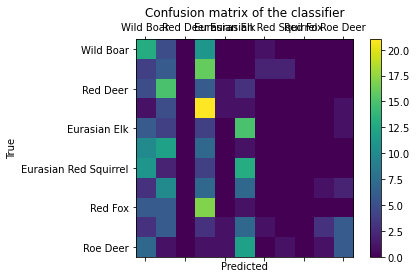

In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, predicted_classes, [0,1,2,3,4,5,6,7,8,9,10])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [85]:
from matplotlib.pyplot import figure

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    figure(figsize=(16, 12), dpi=80)

In [94]:
plt.rcParams["figure.figsize"] = (60,10)

Confusion matrix, without normalization
[[13  5  0 11  0  0  1  0  0  0  0]
 [ 4  6  0 16  0  0  2  2  0  0  0]
 [ 5 15  0  6  1  3  0  0  0  0  0]
 [ 1  5  0 21  1  1  0  0  0  0  1]
 [ 6  4  0  4  0 15  0  0  0  0  1]
 [10 12  0  7  0  1  0  0  0  0  0]
 [11  2  0  4  0 13  0  0  0  0  0]
 [ 3 10  0  7  0  7  0  0  0  1  2]
 [ 6  6  0 17  0  1  0  0  0  0  0]
 [ 3  6  0  3  1  7  1  0  0  3  6]
 [ 7  1  0  1  1 12  0  1  0  1  6]]


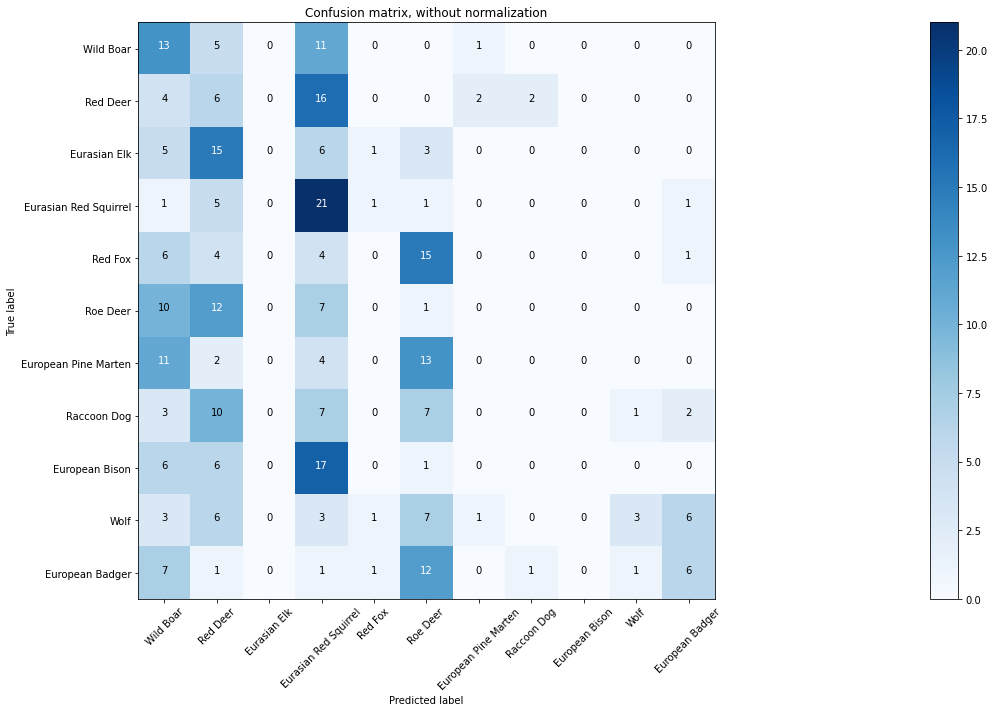

<Figure size 1280x960 with 0 Axes>

In [96]:
cnf_matrix = confusion_matrix(true_classes, predicted_classes,labels=[0,1,2,3,4,5,6,7,8,9,10])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
